# Task 3 - Epithelial to Mesenchymal (EMT) score from the Hallmark EMT or Epithelial to Mesenchymal Plasticity
This notebook analyses the Epithelial to Mesenchymal (EMT) score from the Hallmark EMT or Epithelial to Mesenchymal Plasticity score from [https://www.science.org/doi/10.1126/sciadv.abi7640](https://www.science.org/doi/10.1126/sciadv.abi7640) as well as HALLMARK. 

This notebook is based on the single-cell best practices book (https://github.com/theislab/single-cell-best-practices/). For further explanations of the applied methods please refer to above source.

# Gene set enrichment and pathway analysis 

### Prepare and explore the data

In [1]:
import os
os.environ['R_HOME'] = '/home/icb/till.richter/anaconda3/envs/da_env/lib/R'

In [2]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import anndata as ad
import gdown
import anndata2ri
import rpy2
from rpy2.robjects import r
import random
import session_info



anndata2ri.activate()

In [3]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [4]:
%load_ext rpy2.ipython

In [5]:
!python -m rpy2.situation

rpy2 version:
3.4.5
Python version:
3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]
Looking for R's HOME:
    Environment variable R_HOME: /home/icb/till.richter/anaconda3/envs/da_env/lib/R
    Calling `R RHOME`: /usr/lib64/R
    Environment variable R_LIBS_USER: ~/R/x86_64-conda-linux-gnu-library/4.1
R's additions to LD_LIBRARY_PATH:

R version:
    In the PATH: R version 3.6.0 (2019-04-26) -- "Planting of a Tree"
    Loading R library from rpy2: OK
Additional directories to load R packages from:
None
C extension compilation:
  include:
  ['/home/icb/till.richter/anaconda3/envs/da_env/lib/R/include']
  libraries:
  ['R', 'pcre2-8', 'lzma', 'bz2', 'z', 'rt', 'dl', 'm', 'iconv', 'icuuc', 'icui18n']
  library_dirs:
  ['/home/icb/till.richter/anaconda3/envs/da_env/lib', '/home/icb/till.richter/anaconda3/envs/da_env/lib/R/lib', '/home/icb/till.richter/anaconda3/envs/da_env/lib']
  extra_compile_args:
  []
  extra_link_args:
  ['-Wl,--export-dynamic', '-fopenmp', '-Wl,-O2', '-Wl,--sort-

In [6]:
%%R
suppressPackageStartupMessages({
    library(SingleCellExperiment)
    library(fgsea)
    library(AUCell)
    library(ggplot2)
})

In [7]:
adata_read = sc.read_h5ad('../data/adata/processed_adata1.h5ad')
adata_read.obs

,sample_id,sample_nr,donor,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,log_counts,n_counts,n_genes,size_factors
AAACCCAAGATCACCT-1-1-0-0,9591-2D,0,mouse,1438,7.271704,3167.0,8.060856,31.796653,43.195453,54.152195,70.382065,158.0,5.068904,4.988949,8.060540,3167.0,1438,0.802188
AAACCCAAGCACACAG-1-1-0-0,9591-2D,0,mouse,2030,7.616284,5085.0,8.534247,28.456244,40.255654,50.855457,66.096362,255.0,5.545177,5.014749,8.534050,5085.0,2030,1.280009
AAACCCAAGGCATCTT-1-1-0-0,9591-2D,0,mouse,1581,7.366445,3452.0,8.146998,32.097335,43.134415,53.418308,68.684820,213.0,5.365976,6.170336,8.146709,3452.0,1581,0.853211
AAACCCAAGGGTAGCT-1-1-0-0,9591-2D,0,mouse,2930,7.983099,9941.0,9.204523,34.513630,46.604969,55.577910,67.629011,885.0,6.786717,8.902525,9.204423,9941.0,2930,2.027462
AAACCCACACACGGTC-1-1-0-0,9591-2D,0,mouse,650,6.478510,1089.0,6.993933,32.690542,43.801653,58.677686,86.225895,51.0,3.951244,4.683196,6.993015,1089.0,650,0.255509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTAGCTAAA-1-1-0-0,9591-2D,0,mouse,3308,8.104401,11144.0,9.318747,29.872577,41.358579,51.390883,64.348528,451.0,6.113682,4.047021,9.318657,11144.0,3308,2.719731
TTTGTTGGTTGCTCGG-1-1-0-0,9591-2D,0,mouse,546,6.304449,970.0,6.878326,38.556701,51.340206,64.329897,95.257732,122.0,4.812184,12.577319,6.877296,970.0,546,0.196757
TTTGTTGTCCACTTTA-1-1-0-0,9591-2D,0,mouse,433,6.073045,594.0,6.388561,30.639731,43.939394,60.774411,100.000000,23.0,3.178054,3.872054,6.386879,594.0,433,0.159965
TTTGTTGTCCCGTTGT-1-1-0-0,9591-2D,0,mouse,1063,6.969791,1920.0,7.560601,30.729167,41.197917,52.343750,70.677083,75.0,4.330733,3.906250,7.560081,1920.0,1063,0.460149


In [8]:
adata = adata_read.copy()

In [9]:
adata.layers['counts'] = adata.X

In [16]:
adata.obs['group'] = adata.obs['louvain_r0.5'].astype('string')

In [18]:
# find DE genes by t-test
sc.tl.rank_genes_groups(adata, 'group', method='t-test', key_added = "t-test")

### Get the Pathway and map it to mm

In [19]:
from pyorthomap import FindOrthologs 
# then create the find orthogues object using correct datasets and attributes
# use help(FindOrthologs)
hs2mm = FindOrthologs(
          host = 'http://www.ensembl.org',
          mart = 'ENSEMBL_MART_ENSEMBL',
          from_dataset = 'hsapiens_gene_ensembl',
          to_dataset = 'mmusculus_gene_ensembl',
          from_filters = 'hgnc_symbol',
          from_values = ['TP53', 'TERT'],
          to_attributes = ['external_gene_name'],
          to_homolog_attribute = 'mmusculus_homolog_ensembl_gene',
          from_gene_id_name = 'human_ensembl_gene_id',
          to_gene_id_name = 'mouse_ensembl_gene_id'
    )
    
hs2mm.map()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.21it/s]


,external_gene_name,mouse_ensembl_gene_id,human_ensembl_gene_id,hgnc_symbol
0,Tert,ENSMUSG00000021611,ENSG00000164362,TERT
1,Trp53,ENSMUSG00000059552,ENSG00000141510,TP53


### S1 Pathway

In [20]:
%%R
library(readxl)
my_pathways_s1=read_excel('../data/EMT_gene_sets/sciadv.abi7640_table_s1.xlsx')
my_pathways_s1=as.list(my_pathways_s1)

In [21]:
df = pd.read_excel('../data/EMT_gene_sets/sciadv.abi7640_table_s1.xlsx') # can also index sheet by name or fetch all sheets
hs_pathway_genes_s1 = np.array(df['Conserved_EMP_Signature'].tolist())
len(hs_pathway_genes_s1)

328

In [22]:
from pyorthomap import findOrthologsMmHs, findOrthologsHsMm
orthologies_hsmm = findOrthologsHsMm(from_filters = 'hgnc_symbol',
                  from_values = hs_pathway_genes_s1).map()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.22it/s]


In [23]:
my_pathways_s1 = orthologies_hsmm['external_gene_name'].tolist()
my_pathways_s1[:10]

['Cav2',
 'Klf6',
 'Scpep1',
 'Cdh1',
 'Mx1',
 'Mx2',
 'S100a4',
 'Timp1',
 'Lsr',
 'Rac1']

In [24]:
%R -i my_pathways_s1

## S2 Pathway

In [25]:
%%R
library(readxl)
my_pathways_s2=read_excel('../data/EMT_gene_sets/sciadv.abi7640_table_s2.xlsx')
my_pathways_s2=as.list(my_pathways_s2)

In [26]:
df = pd.read_excel('../data/EMT_gene_sets/sciadv.abi7640_table_s2.xlsx') # can also index sheet by name or fetch all sheets
hs_pathway_genes_s2 = np.array(df['Malignant_specific_EMP'].tolist())
len(hs_pathway_genes_s2)

128

In [27]:
from pyorthomap import findOrthologsMmHs, findOrthologsHsMm
orthologies_hsmm = findOrthologsHsMm(from_filters = 'hgnc_symbol',
                  from_values = hs_pathway_genes_s2).map()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.88it/s]


In [28]:
my_pathways_s2 = orthologies_hsmm['external_gene_name'].tolist()
my_pathways_s2[:10]

['Cdh1', 'Lsr', 'Folr1', 'Rac1', 'Rhoc', 'Elf3', 'Cp', 'Ctse', 'Ndrg1', 'Klf5']

In [29]:
%R -i my_pathways_s2

## Hallmark EMP Pathway

In [30]:
%%R
all_pathways <- gmtPathways('../data/Hallmark/h.all.v7.5.1.symbols.gmt')
my_pathways_hallmark_ <- all_pathways['HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION']

# Define the file name that will be deleted
fn <- '../data/EMT_gene_sets/hallmark_emt.csv'
# Check its existence
if (file.exists(fn)) {
  # Delete file if it exists
  file.remove(fn)
}

lapply(my_pathways_hallmark_, function(x) write.table( data.frame(x), fn, append=T, sep=','))
my_pathways_hallmark_

$HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION
  [1] "COL3A1"    "COL5A2"    "COL5A1"    "FBN1"      "COL1A1"    "FN1"      
  [7] "COL6A3"    "SERPINE1"  "COL1A2"    "COL4A1"    "COL4A2"    "VCAN"     
 [13] "IGFBP3"    "TGFBI"     "SPARC"     "LUM"       "LAMC1"     "LOX"      
 [19] "LAMC2"     "CCN2"      "TAGLN"     "COL7A1"    "LOXL2"     "COL6A2"   
 [25] "ITGAV"     "THBS2"     "COL16A1"   "NNMT"      "TPM1"      "CDH2"     
 [31] "MMP2"      "COL11A1"   "THBS1"     "FAP"       "BGN"       "SERPINH1" 
 [37] "FSTL1"     "POSTN"     "THY1"      "SPP1"      "TNC"       "TFPI2"    
 [43] "NID2"      "ITGB5"     "MMP3"      "VIM"       "LOXL1"     "FBLN5"    
 [49] "COL12A1"   "ELN"       "CDH11"     "COMP"      "SPOCK1"    "BMP1"     
 [55] "IL32"      "LAMA3"     "TIMP1"     "QSOX1"     "TIMP3"     "VCAM1"    
 [61] "CCN1"      "EDIL3"     "CALD1"     "MAGEE1"    "FBLN1"     "SGCB"     
 [67] "ECM1"      "LAMA2"     "FSTL3"     "TPM2"      "INHBA"     "DAB2"     
 [73] "EMP3"      "B

In [31]:
hs_pathway_genes_hallmark = None
hs_pathway_genes_hallmark = pd.read_csv('../data/EMT_gene_sets/hallmark_emt.csv')['x'].tolist()

In [32]:
from pyorthomap import findOrthologsMmHs, findOrthologsHsMm
orthologies_hsmm = findOrthologsHsMm(from_filters = 'hgnc_symbol',
                  from_values = hs_pathway_genes_hallmark).map()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.41it/s]


In [33]:
my_pathways_hallmark = orthologies_hsmm['external_gene_name'].tolist()
my_pathways_hallmark[:10]

['Fap',
 'Itga5',
 'Mmp14',
 'Timp1',
 'Col1a1',
 'Tgfb1',
 'Col5a3',
 'Eno2',
 'Plod3',
 'Cd44']

In [34]:
%R -i my_pathways_hallmark

### Cell-level pathway activity scoring using AUCell

In [ ]:
# Ignore this error. It occurs for some unknown reason, but adata is imported and you can continue to run the next cells
%R -i adata

In [36]:
%%R
cells_rankings <- AUCell_buildRankings(adata, plotStats=FALSE)
cells_AUC_s1 <- AUCell_calcAUC(my_pathways_s1, cells_rankings)
cells_AUC_s2 <- AUCell_calcAUC(my_pathways_s2, cells_rankings)
cells_AUC_hallmark <- AUCell_calcAUC(my_pathways_hallmark, cells_rankings)

R[write to console]: Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



 min   1%   5%  10%  50% 100% 
 331  350  384  432 1129 5050 


R[write to console]: Genes in the gene sets NOT available in the dataset: 
	geneSet: 	103 (30% of 342)

R[write to console]: Genes in the gene sets NOT available in the dataset: 
	geneSet: 	41 (33% of 125)

R[write to console]: Genes in the gene sets NOT available in the dataset: 
	geneSet: 	104 (51% of 204)



In [37]:
%%R
dim(cells_AUC_s1)

[1]     1 16747


In [38]:
%%R
dim(cells_AUC_s2)

[1]     1 16747


In [39]:
%%R
dim(cells_AUC_hallmark)

[1]     1 16747


In [40]:
%%R
# S1
aucell_scores_s1 <- data.frame(cells_AUC_s1@assays@data$AUC)
rownames(aucell_scores_s1) <- cells_AUC_s1@NAMES
colnames(aucell_scores_s1) <- colnames(adata)
# S2
aucell_scores_s2 <- data.frame(cells_AUC_s2@assays@data$AUC)
rownames(aucell_scores_s2) <- cells_AUC_s2@NAMES
colnames(aucell_scores_s2) <- colnames(adata)
# HALLMARK
aucell_scores_hallmark <- data.frame(cells_AUC_hallmark@assays@data$AUC)
rownames(aucell_scores_hallmark) <- cells_AUC_hallmark@NAMES
colnames(aucell_scores_hallmark) <- colnames(adata)

Export the results back to python 

In [41]:
%%R -o aucell_scores_s1
aucell_scores_s1 = aucell_scores_s1

In [42]:
%%R -o aucell_scores_s2 
aucell_scores_s2 = aucell_scores_s2

In [43]:
%%R -o aucell_scores_hallmark 
aucell_scores_hallmark = aucell_scores_hallmark

In [44]:
aucell_scores_s1 = aucell_scores_s1.T
aucell_scores_s2 = aucell_scores_s2.T
aucell_scores_hallmark = aucell_scores_hallmark.T

We now add the scores for the interferon-related REACTOME pathways to the anndata object and annotate the activity level of these pathways in each of the cells on the UMAP:

In [45]:
EMP_pathways = ['geneSet']

adata.obs['EMP Pathway S1 Cook et. al.'] = aucell_scores_s1[EMP_pathways]
adata.obs['EMP Pathway S2 Cook et. al.'] = aucell_scores_s2[EMP_pathways]
adata.obs['EMP Pathway\nHALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION'] = aucell_scores_hallmark[EMP_pathways]

In [46]:
adata.obs['Cluster'] = adata.obs['louvain_r0.5']

Plot the scores on the umap

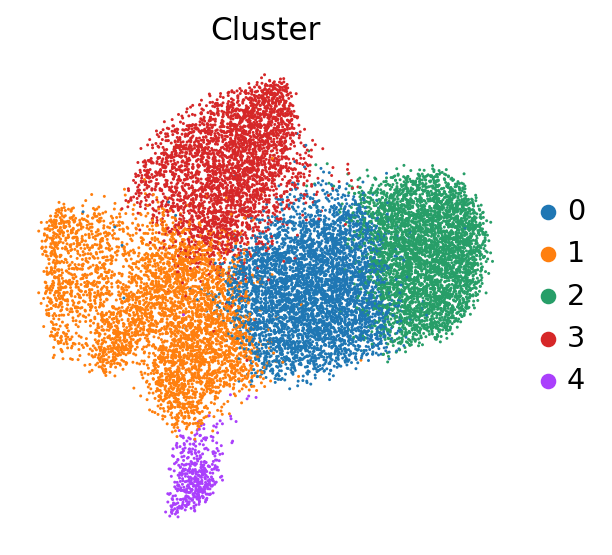

In [47]:
sc.pl.umap(
    adata,
    # color=["condition", "cell_type"],
    color=["Cluster"],
    frameon=False,
    ncols=2,
    wspace = 0.4,
    save='/9591-2D/emp/UMAP_OnlyCluster.pdf'
)
os.rename("figures/umap/9591-2D/emp/UMAP_OnlyCluster.pdf", 
          "../results/task3/9591-2D_emp_UMAP_OnlyCluster.pdf")

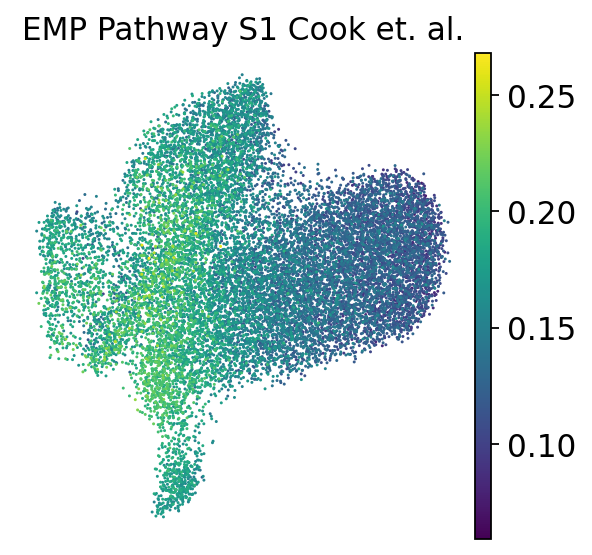

In [48]:
sc.pl.umap(
    adata,
    # color=["condition", "cell_type"],
    color=["EMP Pathway S1 Cook et. al."],
    frameon=False,
    ncols=2,
    wspace = 0.4,
    save='/9591-2D/emp/UMAP_OnlyS1.pdf'
)
os.rename("figures/umap/9591-2D/emp/UMAP_OnlyS1.pdf", 
          "../results/task3/9591-2D_emp_UMAP_OnlyS1.pdf")

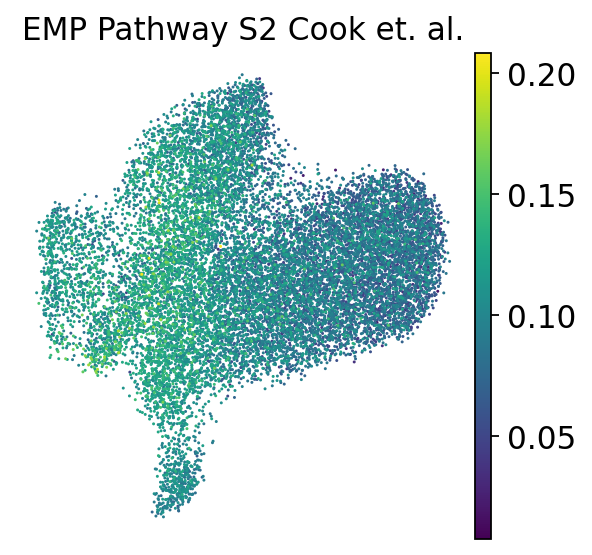

In [49]:
sc.pl.umap(
    adata,
    # color=["condition", "cell_type"],
    color=["EMP Pathway S2 Cook et. al."],
    frameon=False,
    ncols=2,
    wspace = 0.4,
    save='/9591-2D/emp/UMAP_OnlyS2.pdf'
)
os.rename("figures/umap/9591-2D/emp/UMAP_OnlyS2.pdf", 
          "../results/task3/9591-2D_emp_UMAP_OnlyS2.pdf")

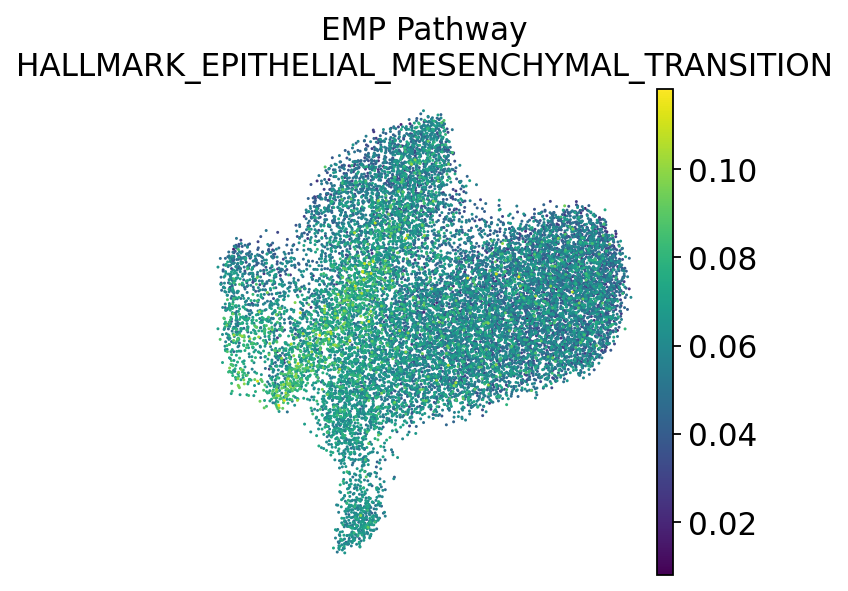

In [50]:
sc.pl.umap(
    adata,
    # color=["condition", "cell_type"],
    color=["EMP Pathway\nHALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"],
    frameon=False,
    ncols=2,
    wspace = 0.4,
    save='/9591-2D/emp/UMAP_OnlyHallmark.pdf'
)
os.rename("figures/umap/9591-2D/emp/UMAP_OnlyHallmark.pdf", 
          "../results/task3/9591-2D_emp_UMAP_OnlyHallmark.pdf")

In [51]:
os.path.exists("figures/9591-2D/emp_violin_counts.pdf")

False

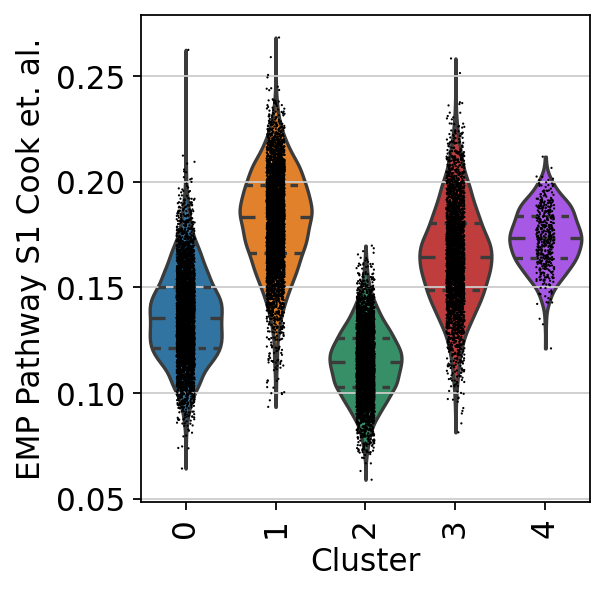

In [52]:
sc.pl.violin(adata, 
             keys=["EMP Pathway S1 Cook et. al."],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             save='/9591-2D/emp_violin_counts_OnlyS1.pdf'
            )
os.rename("figures/violin/9591-2D/emp_violin_counts_OnlyS1.pdf", 
          "../results/task3/9591-2D_emp_violin_counts_OnlyS1.pdf")

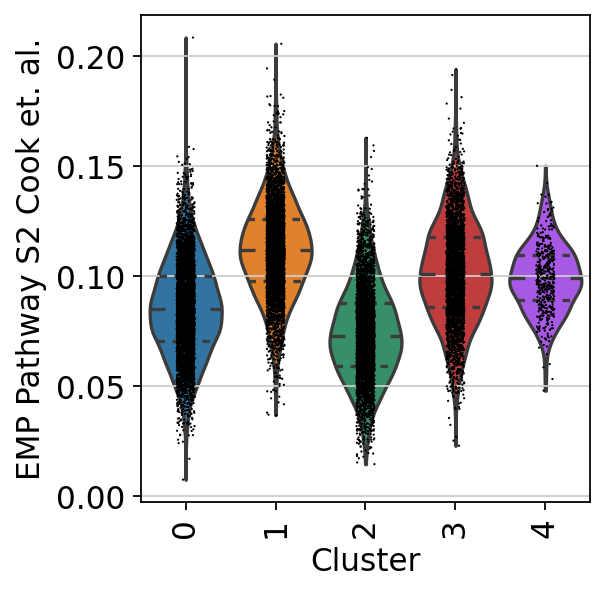

In [53]:
sc.pl.violin(adata, 
             keys=["EMP Pathway S2 Cook et. al."],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             save='/9591-2D/emp_violin_counts_OnlyS2.pdf'
            )
os.rename("figures/violin/9591-2D/emp_violin_counts_OnlyS2.pdf", 
          "../results/task3/9591-2D_emp_violin_counts_OnlyS2.pdf")

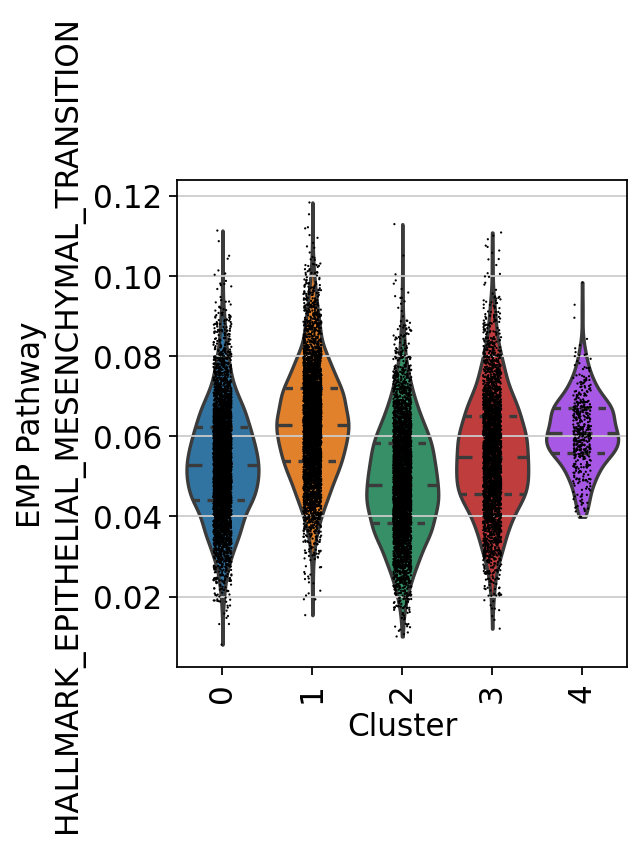

In [54]:
sc.pl.violin(adata, 
             keys=["EMP Pathway\nHALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             save='/9591-2D/emp_violin_counts_OnlyHallmark.pdf'
            )
os.rename("figures/violin/9591-2D/emp_violin_counts_OnlyHallmark.pdf", 
          "../results/task3/9591-2D_emp_violin_counts_OnlyHallmark.pdf")